In [1]:
using Gadfly
using Compose
import Iterators

In [2]:

function squares_manual(len::Measure, n::Int; flip::Bool = false, sq_context=context() ) 
    squares_manual(len, n, n; flip=flip, sq_context=sq_context)
end

function squares_manual(len::Measure, i::Int, j::Int; flip::Bool = false, sq_context=context())
    locs = filter( p -> (p[1]+p[2])%2 == 0 ^ flip, collect(Iterators.product(0:i-1,0:j-1)) )
    compose(sq_context, [rectangle(x/i*len,y/j*len,1/i*len, 1/j*len) for (x,y) in locs ]...)
end

squares_manual (generic function with 2 methods)

In [341]:
function camera_manual_squares(len, N, padding)

    emptybox = compose(context(), line([(0,0),(1,0),(1,1),(0,1),(0,0)]), linewidth(1pt), stroke("black"))

    function subGrid(len::Measure, N::Int, padding::Measure; doReverse=true)
        len1 = len;
        len2 = len;
        px(i) = i*(len+padding)
        py(i) = i*(len+padding)
        
        ngrids = [1, 10, 20, 40, 50, 60, 80, 100]
#         ngrids = [1,2,7,5, 20, 10, 100, 50]
        combs = zip( map(x-> x%2, 1:2N), 0:2N, vcat(ngrids, doReverse ? reverse(ngrids) : ngrids ) )
        grids = [ (context(px(i), py(j), len1, len2, ), squares_manual(len1,k), fill("black")) 
                    for (i,j,k) in map( x-> x, combs) ]
        
        blacks = [ (context(px((i+1)%2), py(j), len1, len2, ), rectangle(), fill("black")) 
                    for (i,j,k) in map( x-> x, combs) ]
        
        font("Helvetica Neue")
        
        compose(
            context(0,0,len,N*len),
            [ (context(), 
                text(px((i+1)%2)+len/8, py(j)+2padding, "$k"), fontsize(2.0), fill("white"),) 
                for (i,j,k) in combs ]...,
            grids...,
            blacks...,
        )
    end

    n = N > 8 ? 8 : N
    function calibgrid(doReverse)
        compose(context(), 
            (context(2padding, 4padding, 1,1), subGrid(len, N, padding; doReverse=doReverse)),
            (context(1padding,3padding, 2len+3padding, (n)*(2len+2padding)+padding),emptybox,),
            (context(len+3padding, 4padding, 1, 1), line([(0,len),(len,len)]), line([(0,0),(0,len)]), linewidth(1mm), stroke("black"), linewidth(1pt), fontsize(3), text(padding, 3padding, "1 cm")),
        )
    end
    
    compose(context(), 
        (context(), calibgrid(false)), 
        (context(5len, 0len, 1w, 1w), calibgrid(true)),
        (context(2len+4padding, 4padding, 3len-3padding, 2n*(len+1padding)-1padding), rectangle()),
    )
end

camera_manual_squares (generic function with 2 methods)

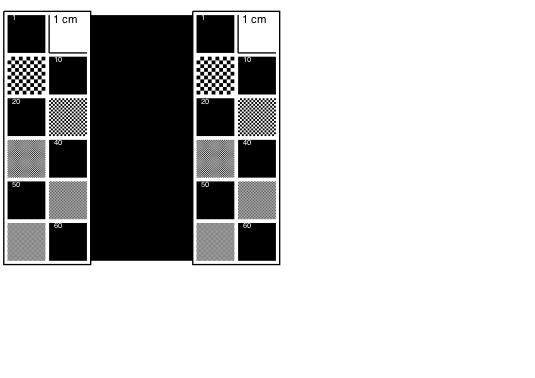

In [342]:
cs1 = camera_manual_squares(10mm, 3, 1mm)


In [343]:
len = 10; N = 10; padding=1mm
cs1 = camera_manual_squares(len*mm, N, padding)

imgPdf = PDF("squares/image (name=camera_manual_squares; N=$N ; dim=$len mm ).pdf", 8.5inch, 11inch)
draw(imgPdf, compose(context(+1inch,+1inch,8.5inch, 11inch), cs1))


In [344]:
len = 5; N = 10; padding=1mm
cs1 = camera_manual_squares(len*mm, N, padding)

imgPdf = PDF("squares/image (name=camera_manual_squares; N=$N ; dim=$len mm ).pdf", 8.5inch, 11inch)
draw(imgPdf, compose(context(+1inch,+1inch,8.5inch, 11inch), cs1))


In [345]:
len = 15; N = 10; padding=1mm
cs1 = camera_manual_squares(len*mm, N, padding)

imgPdf = PDF("squares/image (name=camera_manual_squares; N=$N ; dim=$len mm ).pdf", 8.5inch, 11inch)
draw(imgPdf, compose(context(+1inch,+1inch,8.5inch, 11inch), cs1))
